In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

In [2]:
gt =   ["C", "NC","C", "C", "C","NC","NC","NC","NC","C", "NC","NC","C", "C", "NC","NC","NC"]
pred = ["NC","NC","NC","NC","C","NC","NC","C", "NC","NC","C", "C", "NC","NC","NC","C", "NC"] # Where C = Claim, NC = No Claim

In [3]:
#FN,TN,FN,FN,TP,TN,TN,FP,FN,FN,FP,FP.FN,FN,TN,FP,TN
#FN = 7
#FP = 3
#TP = 2
#TN = 5
#Total Data points = 17

#Accuracy = 7/17 = 41.17% 
#sensitvity = 2/9 = 22%
#Specificity = 5/8 = 62.5%


In [4]:

# Unnormalised

#                   Ground Truth
#_______________________________________________
# |          |     CLAIM    |      NO CLAIM    |
#_|__________|______________|__________________|
#P|          |              |                  |
#R| CLAIM    |       2      |         3        |
#E|          |              |                  |
#D|__________|______________|__________________|
#I|          |              |                  |
#C| NO CLAIM |              |                  |
#T|          |       7      |         5        |
#E|          |              |                  |
#D|__________|______________|__________________|
# |          |              |                  |
# |          |       9      |         8        |
#_|__________|______________|__________________|


In [5]:

# Normalised

#                   Ground Truth
#_______________________________________________
# |          |     CLAIM    |      NO CLAIM    |
#_|__________|______________|__________________|
#P|          |              |                  |
#R| CLAIM    |     0.22     |      0.37        |
#E|          |              |                  |
#D|__________|______________|__________________|
#I|          |              |                  |
#C| NO CLAIM |              |                  |
#T|          |     0.77     |      0.62        |
#E|          |              |                  |
#D|__________|______________|__________________|
# |          |              |                  |
# |          |       9      |         8        |
#_|__________|______________|__________________|


In [6]:
tn,fp,fn,tp = confusion_matrix(gt, pred).ravel()

(tn,fp,fn,tp)

(1, 6, 4, 6)

In [7]:
iris = datasets.load_iris()

In [8]:
#Code taken and editied from here(https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) added to make confusion matrixes look better and clearer than the standard array format


classes = ["C","NC"] #set clasess for data analysing 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title: #sets title of confustion matrix if there isnt one
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # set confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data bhased on the set class data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[1 6]
 [4 6]]


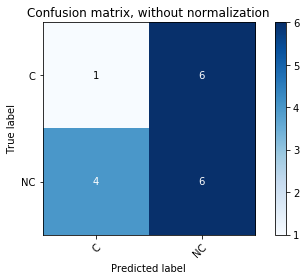

In [9]:
plot_confusion_matrix(gt, pred, classes=classes, title='Confusion matrix, without normalization')
#non normalised confusion matrix

Normalized confusion matrix
[[0.14285714 0.85714286]
 [0.4        0.6       ]]


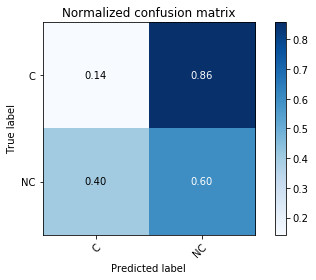

In [10]:
plot_confusion_matrix(gt, pred, classes=classes, normalize=True, title='Normalized confusion matrix')
#normalised confusion matrix

In [11]:
simpledata = pd.read_csv("toy_data.csv").copy()
simpledata.head()

,x,y
0,26,-9.210066
1,58,-120.894408
2,259,487.066020
3,309,595.576618
4,323,376.560146


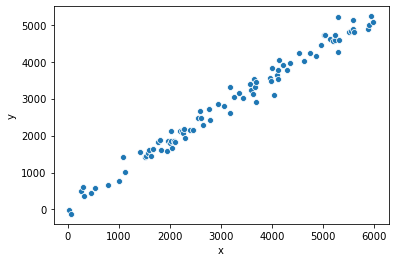

In [12]:
sns.scatterplot(x="x", y="y", data=simpledata)

In [13]:
x = simpledata['x'] #find col x
y = simpledata['y'] #find col y

In [14]:
xTrain, xTest, = train_test_split(x, test_size = 0.30, shuffle = False) #70/30 split of the x data
yTrain, yTest, = train_test_split(y, test_size = 0.30, shuffle = False) #70/30 split of the y data

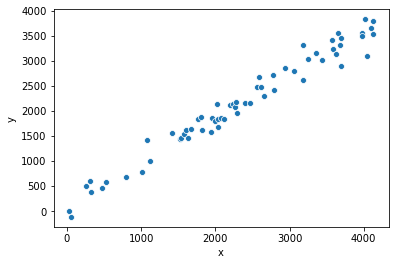

In [15]:
Train = sns.scatterplot(x=xTrain, y=yTrain) # plot the train split

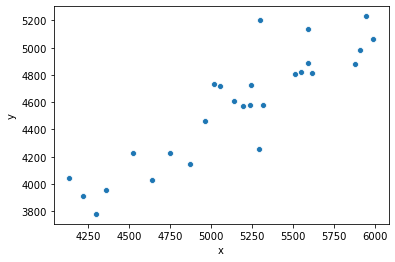

In [16]:
Test = sns.scatterplot(x=xTest, y=yTest)#plot the test split

In [17]:
model = LinearRegression()

train_x = xTrain
train_y = yTrain
print("shape before reshaping:")
print("Train X", train_x.shape)
print("Train Y",train_y.shape)
print ("\n")

train_x = np.asarray(train_x).reshape(-1,1)
train_y = np.asarray(train_y).reshape(-1,1)
print("Shape after reshaping:")
print("Train X: ", train_x.shape)
print("Train Y: ", train_y.shape)
print("\n") 

test_x = xTest
test_y = yTest

print("shape before reshaping:")
print("Train X", test_x.shape)
print("Train Y",test_y.shape)
print ("\n")

test_x = np.asarray(test_x).reshape(-1,1)
test_y = np.asarray(test_y).reshape(-1,1)
print("Shape after reshaping:")
print("Test X: ", test_x.shape)
print("Test Y: ", test_y.shape)
print("\n") 

shape before reshaping:
Train X (63,)
Train Y (63,)


Shape after reshaping:
Train X:  (63, 1)
Train Y:  (63, 1)


shape before reshaping:
Train X (27,)
Train Y (27,)


Shape after reshaping:
Test X:  (27, 1)
Test Y:  (27, 1)




In [18]:
reg_model = model.fit(X=train_x, y=train_y)

In [19]:
yPredtest = reg_model.predict(test_x)

df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': yPredtest.flatten()})
df.head()

,Actual,Predicted
0,4042.441041,3706.947776
1,3913.462030,3783.169531
2,3779.815519,3852.462034
3,3955.689423,3905.297568
4,4227.499673,4047.347201


In [20]:
MSETrain = mean_squared_error(train_y, reg_model.predict(train_x))
print("Mean Squared Error (Train)",MSETrain)

MSETest = mean_squared_error(test_y, reg_model.predict(test_x))
print("Mean Squared Error (Test)",MSETest)

MAETrain = mean_absolute_error(train_y,reg_model.predict(train_x))
print("Mean Absolute Error (Train)",MAETrain)

MAETest = mean_absolute_error(test_y,reg_model.predict(test_x))
print("Mean Absolute Error (Test)",MAETest)


Mean Squared Error (Train) 31354.008308256183
Mean Squared Error (Test) 42839.16356413313
Mean Absolute Error (Train) 138.53566226759432
Mean Absolute Error (Test) 165.05715254469837


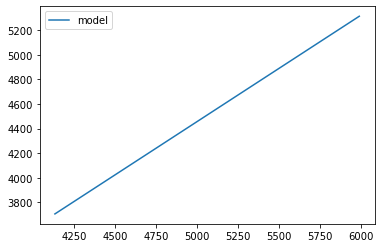

In [21]:
sns.lineplot(x=test_x.flatten(), y=yPredtest.ravel(), label ="model")

In [22]:
print(reg_model.coef_)
print(reg_model.intercept_)

[[0.8661563]]
[127.98995902]


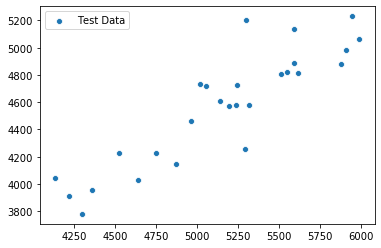

In [23]:
sns.scatterplot(x=test_x.flatten(), y=test_y.flatten(), label ="Test Data")

In [24]:
HardData = pd.read_csv("toy_data_harder.csv").copy()
HardData.head()

,x,y
0,37,488.125953
1,52,397.451834
2,109,1154.401700
3,123,1397.371822
4,273,4073.927514


In [25]:
xhard = HardData['x'] #find col x
yhard = HardData['y'] #find col y

In [26]:
xTrainHard, xTestHard, = train_test_split(xhard, test_size = 0.30, shuffle = False) #70/30 split of the x data
yTrainHard, yTestHard, = train_test_split(yhard, test_size = 0.30, shuffle = False) #70/30 split of the y data

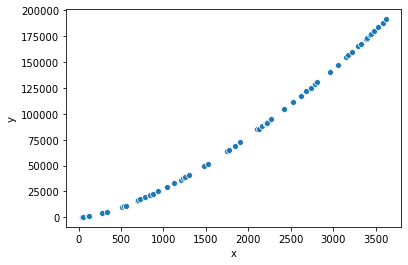

In [27]:
TrainHard = sns.scatterplot(x=xTrainHard, y=yTrainHard) # plot the train split

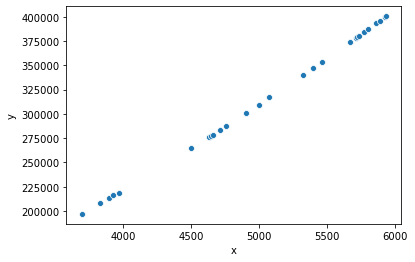

In [28]:
TestHard = sns.scatterplot(x=xTestHard, y=yTestHard)#plot the test split

In [29]:
modelHard = LinearRegression()

train_xHard = xTrainHard
train_yHard = yTrainHard
print("shape before reshaping:")
print("Train X", train_xHard.shape)
print("Train Y",train_yHard.shape)
print ("\n")

train_xHard = np.asarray(train_xHard).reshape(-1,1)
train_yHard = np.asarray(train_yHard).reshape(-1,1)
print("Shape after reshaping:")
print("Train X: ", train_xHard.shape)
print("Train Y: ", train_yHard.shape)
print("\n") 

test_xHard = xTestHard
test_yHard = yTestHard

print("shape before reshaping:")
print("Train X", test_xHard.shape)
print("Train Y",test_yHard.shape)
print ("\n")

test_xHard = np.asarray(test_xHard).reshape(-1,1)
test_yHard = np.asarray(test_yHard).reshape(-1,1)
print("Shape after reshaping:")
print("Test X: ", test_xHard.shape)
print("Test Y: ", test_yHard.shape)
print("\n") 

shape before reshaping:
Train X (63,)
Train Y (63,)


Shape after reshaping:
Train X:  (63, 1)
Train Y:  (63, 1)


shape before reshaping:
Train X (27,)
Train Y (27,)


Shape after reshaping:
Test X:  (27, 1)
Test Y:  (27, 1)




In [30]:
reg_modelHard = model.fit(X=train_xHard, y=train_yHard)

In [31]:
yPredtestHard = reg_modelHard.predict(test_xHard)

dfHard = pd.DataFrame({'Actual': test_yHard.flatten(), 'Predicted': yPredtestHard.flatten()})
dfHard.head()

,Actual,Predicted
0,196968.160423,182515.463354
1,207869.367879,189972.452662
2,213410.693852,193812.245664
3,216024.859823,195370.422534
4,218635.049114,197596.389491


In [32]:
MSETrainHard = mean_squared_error(train_yHard, reg_modelHard.predict(train_xHard))
print("Mean Squared Error (Train)",MSETrainHard)

MSETestHard = mean_squared_error(test_yHard, reg_modelHard.predict(test_xHard))
print("Mean Squared Error (Test)",MSETest)

MAETrainHard = mean_absolute_error(train_yHard,reg_modelHard.predict(train_xHard))
print("Mean Absolute Error (Train)",MAETrainHard)

MAETestHard = mean_absolute_error(test_yHard,reg_modelHard.predict(test_xHard))
print("Mean Absolute Error (Test)",MAETestHard)


Mean Squared Error (Train) 73183154.74070227
Mean Squared Error (Test) 42839.16356413313
Mean Absolute Error (Train) 7210.571720237118
Mean Absolute Error (Test) 58977.559762247874


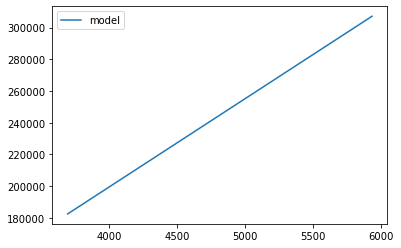

In [33]:
sns.lineplot(x=test_xHard.flatten(), y=yPredtestHard.ravel(), label ="model")

In [34]:
print(reg_modelHard.coef_)
print(reg_modelHard.intercept_)

[[55.64917394]]
[-22996.93600192]


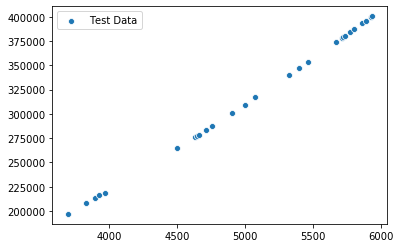

In [35]:
sns.scatterplot(x=test_xHard.flatten(), y=test_yHard.flatten(), label ="Test Data")

In [36]:
#rehape HardData so Sklearn understands it
whole_x = np.asarray(HardData['x']).reshape(-1,1)
whole_y = np.asarray(HardData['y']).reshape(-1,1)

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x25B49D70>>

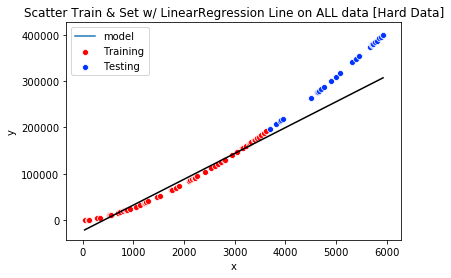

In [37]:
fig,ax=plt.subplots()
plt.title("Scatter Train & Set w/ LinearRegression Line on ALL data [Hard Data]")

#lineplot of our model applied to all our data + test
sns.lineplot(x=HardData['x'],y=reg_modelHard.predict(whole_x).ravel(), ax=ax, label='model')

#line plot of just training data. Red Data Points
sns.scatterplot(x=xTrainHard, y=yTrainHard,ax=ax, c=[[1,0,0]],label = 'Training')

#line plot of just testing data. Blue-ish data points
sns.scatterplot(x=xTestHard, y=yTestHard,ax=ax, c=[[0,0.2,1]],label = 'Testing')

#colour the line plot in black.
plt.gca().get_lines()[0].set_color("Black")

#show legend
ax.legend